In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cactus-challenge/Python Test_conditions.csv
/kaggle/input/cactus-challenge/Python Test Files - Sudoku_attemps.csv


# Cactus Placement Challenge

* Name : Viren Shashikant Baria
* Branch: BE-EXTC  
* SAP ID: 60002160005
* Email: virenbaria17@gmail.com         
* Institute - Dwarkadas J. Sanghvi College of Engineering

# Exploratory Data Analysis

In [2]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

### Reading the given data

#### Reading the "test_conditions" file

In [3]:
df = pd.read_csv("../input/cactus-challenge/Python Test_conditions.csv")
df

,Batch ID,Soln D Concentration,Soln A Concentration,Relative Humidity,White Noise (db),Soln B Concentration,Soln C Concentration
0,d97a38e9e5ee00db7cefa749b244f060,20.768,43.845,19.465,27.252,62.326,47.553
1,daa5784c8992b702f4d7b5e1969964ab,20.734,33.652,16.460,4.390,121.505,48.268
2,ece4e62543727dbde87e50c468b78740,20.752,15.213,30.325,0.000,130.292,47.657
3,1371aa52cce4ca21fd7d4a0675155400,20.566,19.980,62.797,0.000,164.684,48.295
4,d4a3cd8226a6949c1768090be177e2f2,20.044,32.523,85.221,0.000,268.479,17.411
...,...,...,...,...,...,...,...
459,d485372c2f31f86cf630c7b37eda5535,20.201,76.633,53.578,8.855,116.295,127.454
460,6ebde01ce199bcaf735cddd2d431868e,20.299,64.948,89.000,1.113,259.646,64.064
461,d309edc91b66228bb4885a27cf212a35,20.472,61.695,88.870,3.926,278.604,79.911
462,a63f12a336cf99fc0b485ed06d60c1ff,19.753,68.317,89.000,56.935,278.054,21.209


#### The "Python Test_conditions.csv" file consists of 464 unique compositions of the drink, which is consumed by the subject. There are 7 features present for each composition.
This drink had various concentration of 4 Solutions A, B, C and D. Solution A was sugar syrup, solution B, C and D were red, blue and green food color respectively. The different concentration of the food color would change the effective color of the drink and the sugar syrup concentration would change the taste. Participants had no clue about the actual contents of the drinks they were given. The room also had ambient white noise along with controlled level of humidity. The concentration of the four solutions along with the decibel rating of the white noise and the relative humidity has been provided in the file ‘Test_conditions.csv’.

#### Reading the "sudoku_attempts" file

In [4]:
test_df = pd.read_csv('../input/cactus-challenge/Python Test Files - Sudoku_attemps.csv')
test_df

,Batch ID,Game ID,Tried,Completed
0,2d90c70c14bdc915e4c40f2b23dfe848,Sudoku #1,2,0
1,ebde0ac509c7e9fc1e59d7a09cf6f5c3,Sudoku #1,3,0
2,65ad109730bb554b62e38258a40bee26,Sudoku #1,2,0
3,fa79df7db42866d84f93cf47d2d5b0e7,Sudoku #2,8,0
4,ac03eb2e0700d39176c077b7f4a727a3,Sudoku #1,2,0
...,...,...,...,...
4072,49d6deba67a56aac5e08429b1b13dee0,Sudoku #2,2,0
4073,8df8fd495a79b0cd67116bd9a120aa8e,Sudoku #1,8,0
4074,8df8fd495a79b0cd67116bd9a120aa8e,Sudoku #1,8,0
4075,52ccbbc15c14054ad13fd028cf36b6dd,Sudoku #1,2,0


#### The "sudoku_attempts.csv" file consists of 4077 attempts by different subjects and number of sudoku's attempted by them and number of sudoku's completed by the subject.



## Check for null values

In [5]:
# Glancing the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Batch ID                464 non-null object
Soln D Concentration    464 non-null float64
Soln A Concentration    464 non-null float64
Relative Humidity       464 non-null float64
White Noise (db)        464 non-null float64
Soln B Concentration    464 non-null float64
Soln C Concentration    464 non-null float64
dtypes: float64(6), object(1)
memory usage: 25.5+ KB


In [6]:
# Glancing the columns 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 4 columns):
Batch ID     4077 non-null object
Game ID      4077 non-null object
Tried        4077 non-null int64
Completed    4077 non-null int64
dtypes: int64(2), object(2)
memory usage: 127.5+ KB


In [7]:
df.isnull().sum()

Batch ID                0
Soln D Concentration    0
Soln A Concentration    0
Relative Humidity       0
White Noise (db)        0
Soln B Concentration    0
Soln C Concentration    0
dtype: int64

In [8]:
test_df.isnull().sum()

Batch ID     0
Game ID      0
Tried        0
Completed    0
dtype: int64

## Unique Sudoku's present and number of attempts and number of successful attempts made by the subject.

In [9]:
sud=test_df.groupby('Game ID').sum()
sud

,Tried,Completed
Game ID,,
Sudoku #1,15259,8353
Sudoku #10,33,11
Sudoku #11,57,29
Sudoku #12,8,2
Sudoku #13,225,16
Sudoku #14,6,0
Sudoku #15,4,2
Sudoku #16,3,3
Sudoku #17,199,58


## Joining the two data sets
#### First we need to select a common column in the two datasets and then join them using "join" command. 

In [10]:
test_df = test_df.set_index('Batch ID')
test_df

,Game ID,Tried,Completed
Batch ID,,,
2d90c70c14bdc915e4c40f2b23dfe848,Sudoku #1,2,0
ebde0ac509c7e9fc1e59d7a09cf6f5c3,Sudoku #1,3,0
65ad109730bb554b62e38258a40bee26,Sudoku #1,2,0
fa79df7db42866d84f93cf47d2d5b0e7,Sudoku #2,8,0
ac03eb2e0700d39176c077b7f4a727a3,Sudoku #1,2,0
...,...,...,...
49d6deba67a56aac5e08429b1b13dee0,Sudoku #2,2,0
8df8fd495a79b0cd67116bd9a120aa8e,Sudoku #1,8,0
8df8fd495a79b0cd67116bd9a120aa8e,Sudoku #1,8,0


#### Here, we merge/join the two datasets by default method, which is "left join".

In [11]:
train_df = pd.merge(test_df, df, on='Batch ID')
train_df = train_df.set_index('Batch ID')
train_df

,Game ID,Tried,Completed,Soln D Concentration,Soln A Concentration,Relative Humidity,White Noise (db),Soln B Concentration,Soln C Concentration
Batch ID,,,,,,,,,
2d90c70c14bdc915e4c40f2b23dfe848,Sudoku #1,2,0,20.466,60.540,17.546,34.521,68.004,49.558
ebde0ac509c7e9fc1e59d7a09cf6f5c3,Sudoku #1,3,0,20.624,71.990,19.305,2.785,117.550,52.450
65ad109730bb554b62e38258a40bee26,Sudoku #1,2,0,20.192,106.830,24.218,21.283,259.121,77.497
fa79df7db42866d84f93cf47d2d5b0e7,Sudoku #2,8,0,20.298,94.253,25.219,24.293,279.779,98.774
ac03eb2e0700d39176c077b7f4a727a3,Sudoku #1,2,0,19.824,87.999,66.153,80.772,264.688,15.563
...,...,...,...,...,...,...,...,...,...
6ebde01ce199bcaf735cddd2d431868e,Sudoku #1,3,0,20.299,64.948,89.000,1.113,259.646,64.064
d309edc91b66228bb4885a27cf212a35,Sudoku #1,2,2,20.472,61.695,88.870,3.926,278.604,79.911
d309edc91b66228bb4885a27cf212a35,Sudoku #1,12,6,20.472,61.695,88.870,3.926,278.604,79.911


In [12]:
train_df = train_df.replace({'Game ID':{'Sudoku #1': '1','Sudoku #2': '2','Sudoku #3': '3',
                                       'Sudoku #4': '4','Sudoku #5': '5','Sudoku #6': '6',
                                       'Sudoku #7': '7','Sudoku #8': '8','Sudoku #9': '9',
                                       'Sudoku #10': '10','Sudoku #11': '11','Sudoku #12': '12',
                                       'Sudoku #13': '13','Sudoku #14': '14','Sudoku #15': '15',
                                       'Sudoku #16': '16','Sudoku #17': '17','Sudoku #18': '18',
                                       'Sudoku #19': '19','Sudoku #20': '20','Sudoku #21': '21',
                                       'Sudoku #22': '22','Sudoku #23': '23','Sudoku #24': '24',
                                       'Sudoku #25': '25','Sudoku #26': '26'}})
train_df

,Game ID,Tried,Completed,Soln D Concentration,Soln A Concentration,Relative Humidity,White Noise (db),Soln B Concentration,Soln C Concentration
Batch ID,,,,,,,,,
2d90c70c14bdc915e4c40f2b23dfe848,1,2,0,20.466,60.540,17.546,34.521,68.004,49.558
ebde0ac509c7e9fc1e59d7a09cf6f5c3,1,3,0,20.624,71.990,19.305,2.785,117.550,52.450
65ad109730bb554b62e38258a40bee26,1,2,0,20.192,106.830,24.218,21.283,259.121,77.497
fa79df7db42866d84f93cf47d2d5b0e7,2,8,0,20.298,94.253,25.219,24.293,279.779,98.774
ac03eb2e0700d39176c077b7f4a727a3,1,2,0,19.824,87.999,66.153,80.772,264.688,15.563
...,...,...,...,...,...,...,...,...,...
6ebde01ce199bcaf735cddd2d431868e,1,3,0,20.299,64.948,89.000,1.113,259.646,64.064
d309edc91b66228bb4885a27cf212a35,1,2,2,20.472,61.695,88.870,3.926,278.604,79.911
d309edc91b66228bb4885a27cf212a35,1,12,6,20.472,61.695,88.870,3.926,278.604,79.911


## Visualizing Data

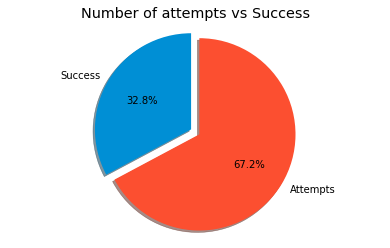

In [13]:
x = train_df["Completed"].sum()
y = train_df["Tried"].sum()
labels = "Success", "Attempts"
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie([x,y], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Number of attempts vs Success")
plt.show()

### 32.8% subjects were able to complete the given suduko.

In [14]:
train_df.groupby(['Tried','Completed'])['Completed'].count()

Tried  Completed
1      0             36
       1             18
       2              1
2      0            328
       1              6
                   ... 
12     8             27
       9             30
       10            41
       11            23
       12            42
Name: Completed, Length: 78, dtype: int64

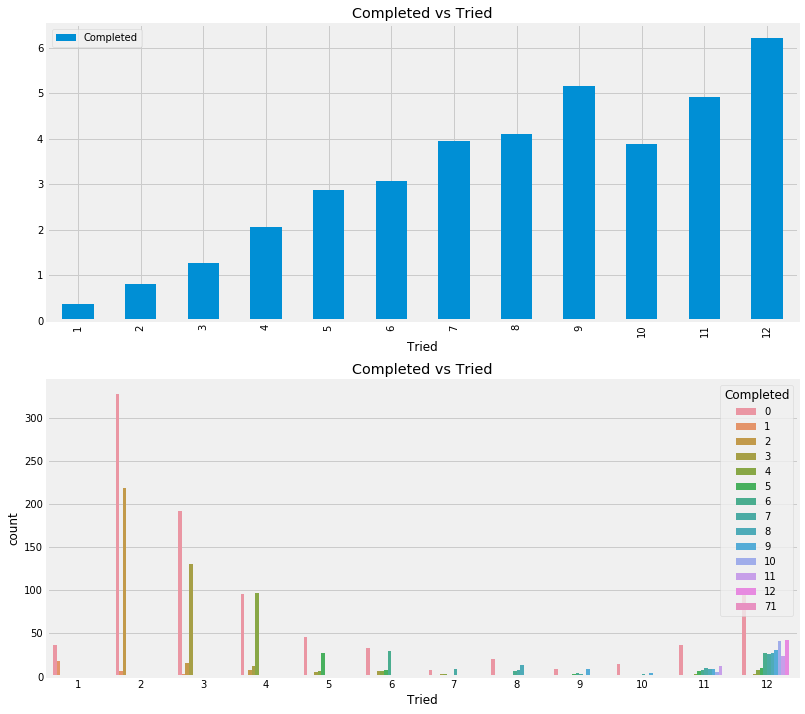

In [15]:
f,ax=plt.subplots(2,1,figsize=(12,12))
train_df[['Tried','Completed']].groupby(['Tried']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Completed vs Tried')
sns.countplot('Tried',hue='Completed',data=train_df,ax=ax[1])
ax[1].set_title('Completed vs Tried')
plt.show()

### Corelation between the given data

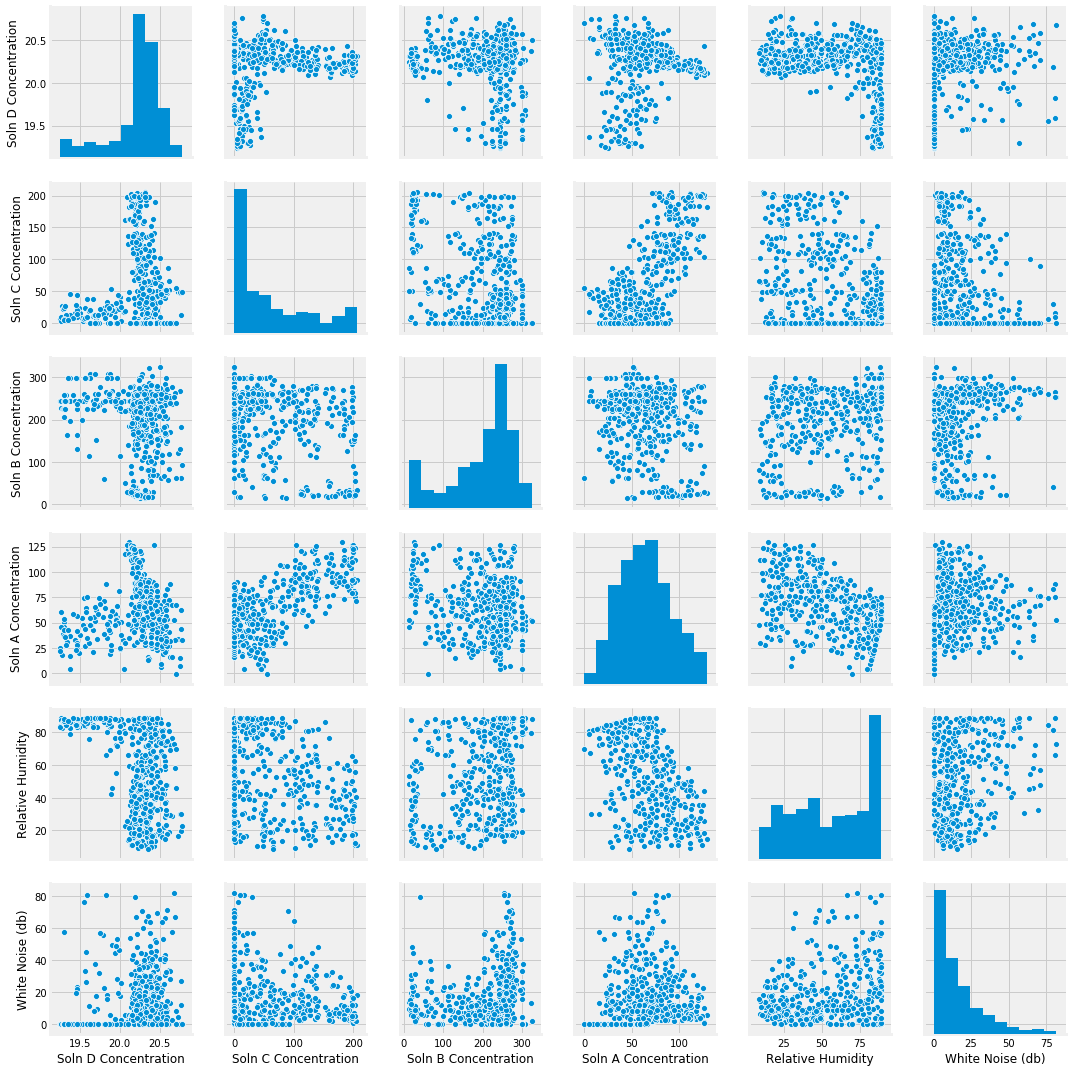

In [16]:
cols = ['Soln D Concentration', 'Soln C Concentration', 'Soln B Concentration', 'Soln A Concentration', 'Relative Humidity', 'White Noise (db)']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

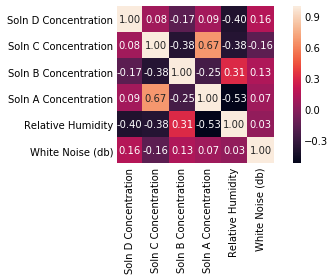

In [17]:
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

### Effect of Each Solution on final outcome

Text(0.5, 1.0, 'Soln A Concentration vs Successful attempts')

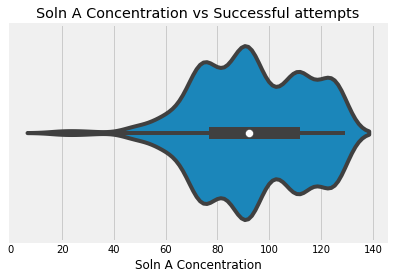

In [18]:
sns.violinplot("Soln A Concentration", hue="Completed", data=train_df, split=True)
plt.title('Soln A Concentration vs Successful attempts')

Text(0.5, 1.0, 'Soln B Concentration vs Successful attempts')

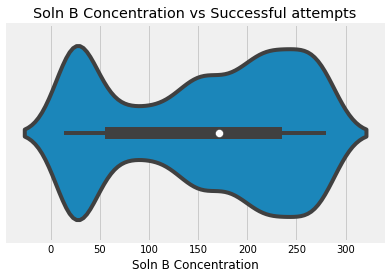

In [19]:
sns.violinplot("Soln B Concentration", hue="Completed", data=train_df, split=True)
plt.title('Soln B Concentration vs Successful attempts')

Text(0.5, 1.0, 'Soln C Concentration vs Successful attempts')

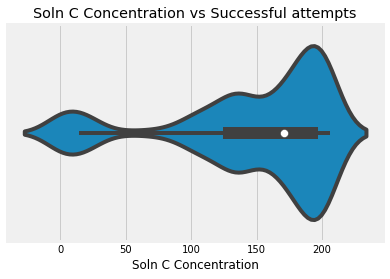

In [20]:
sns.violinplot("Soln C Concentration", hue="Completed", data=train_df, split=True)
plt.title('Soln C Concentration vs Successful attempts')

Text(0.5, 1.0, 'Soln D Concentration vs Successful attempts')

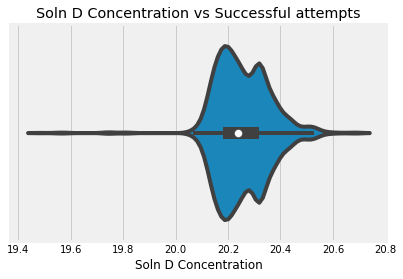

In [21]:
sns.violinplot("Soln D Concentration", hue="Completed", data=train_df, split=True)
plt.title('Soln D Concentration vs Successful attempts')

# Training the model using Linear Regression

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
X = train_df.drop("Completed",axis=1)
Y = train_df['Completed']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1421, 8) (474, 8) (1421,) (474,)


### Estimating the coefficient of a regression model via scikit-learn

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [26]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)



# Checking performance of the model

In [27]:
# The intercept
print("Intercept: ", regr.intercept_)
# The coefficients
print("Coefficients: ", regr.coef_[0])
# The mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))  
# The root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: ', r2_score(y_test, y_pred))

Intercept:  -56.90659488339681
Coefficients:  -0.009814776335690754
Mean Absolute Error: 1.9509809366922055
Mean Squared Error:  6.33239746127068
Root Mean Squared Error: 2.516425532629702
Variance score:  0.44390594141117934


In [28]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
Batch ID,,
90bcdff2c3c3974160a91129a362a62f,2,2.040326
666fe43c458dcc299f720eca2010afdc,8,6.510294
9ae141a8b71a78a97f1eb8cb7da78fc9,4,2.547494
90bcdff2c3c3974160a91129a362a62f,0,2.069770
abbef2f1c3c791cf668b5f46aae7b7d5,0,5.342000
...,...,...
401afa42e63272c73d80a9fc34a2a298,3,2.099018
18334cbb79750fcc83b3a253fcd18541,0,0.075154
570ed16bb3e81a02eb0a7ce0abd5cedf,0,1.241378
